<a href="https://colab.research.google.com/github/DiannitaOlipmimi/Visualisasi/blob/main/Online_Courses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LINEAR PROGRAMING
---
memilih online courses


In [ ]:
pip install pulp

In [ ]:
from pulp import *
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/utaridina/Optimization-New/master/online_course.csv"
data = pd.read_csv(url, encoding= 'unicode_escape')
data[:5]

,No,Judul,Deskripsi,Instruktur,Peringkat,Total Jam,Harga
0,1,R Level 1 - Data Analytics with R,Use R for Data Analytics and Data Mining,R-Tutorials Training,4.4,87,2380000
1,2,Careers in Data Science A-Z,How to Become a Top Level Data Scientist - Lea...,"Kirill Eremenko, Hadelin de Ponteves, SuperDat...",4.5,52,2800000
2,3,Intro to Data Science: Your Step-by-Step Guide...,"Learn the critical elements of Data Science, f...","Kirill Eremenko, Hadelin de Ponteves, SuperDat...",4.3,42,2800000
3,4,R Programming For Absolute Beginners,Learn the basics of writing code in R - your f...,Bogdan Anastasiei,4.3,119,560000
4,5,Python & Introduction to Data Science,Learn the basics of Python and the most import...,AI 4 MY,4.1,68,1330000


In [ ]:
data = data[data['Peringkat'] >= 4.3]
data.reset_index(drop=True, inplace=True)
data.head()

,No,Judul,Deskripsi,Instruktur,Peringkat,Total Jam,Harga
0,1,R Level 1 - Data Analytics with R,Use R for Data Analytics and Data Mining,R-Tutorials Training,4.4,87,2380000
1,2,Careers in Data Science A-Z,How to Become a Top Level Data Scientist - Lea...,"Kirill Eremenko, Hadelin de Ponteves, SuperDat...",4.5,52,2800000
2,3,Intro to Data Science: Your Step-by-Step Guide...,"Learn the critical elements of Data Science, f...","Kirill Eremenko, Hadelin de Ponteves, SuperDat...",4.3,42,2800000
3,4,R Programming For Absolute Beginners,Learn the basics of writing code in R - your f...,Bogdan Anastasiei,4.3,119,560000
4,7,"3 in 1! Cisco CCNA, Python Programming, & Netw...",Kursus Python for Network Engineers. Belajar 3...,"Ahmad Rosid Komarudin, Aguna Course",4.5,76,1120000


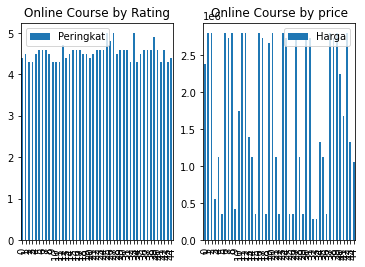

In [ ]:
fig, axs = plt.subplots(1,2)
my_plot = data[['Judul', 'Peringkat']].plot(kind='bar', title="Online Course by Rating", ax=axs[0])
my_plot = data[['Judul', 'Harga']].plot(kind='bar', title="Online Course by price", ax=axs[1])

In [ ]:
# membuat tujuan Lp (maksimum) 
prob = pulp.LpProblem('BuyingOnlineCourse', LpMaximize)

In [ ]:
# membuat keputusan 
decision_variables = []
for rownum, row in data.iterrows():
  variable = str('x' + str(rownum))
  variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') 
  decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))
print ("Array with decision_variables: " + str(decision_variables))

Total number of decision_variables: 45
Array with decision_variables: [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44]


In [ ]:
# membuat fungsi optimisasi
total_course = ""
for i, course in enumerate(decision_variables):
	total_course += course

prob += total_course
print ("Optimization function: " + str(total_course))

Optimization function: x0 + x1 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x2 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x3 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x4 + x40 + x41 + x42 + x43 + x44 + x5 + x6 + x7 + x8 + x9


In [ ]:
hours_day_read = 10
days_month = 22

In [ ]:
# membuat fungsi batasan 

total_course_needs_to_take = ""
for rownum, row in data.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['Total Jam']*schedule
			total_course_needs_to_take += formula

total_course_can_take = 1*hours_day_read*days_month

prob += (total_course_needs_to_take == total_course_can_take)
print ("Constrains: " + str(total_course_needs_to_take))

Constrains: 87*x0 + 52*x1 + 63*x10 + 104*x11 + 85*x12 + 33*x13 + 76*x14 + 78*x15 + 81*x16 + 127*x17 + 196*x18 + 111*x19 + 42*x2 + 60*x20 + 76*x21 + 78*x22 + 81*x23 + 127*x24 + 7*x25 + 23*x26 + 37*x27 + 76*x28 + 78*x29 + 119*x3 + 81*x30 + 127*x31 + 8*x32 + 5*x33 + 46*x34 + 76*x35 + 78*x36 + 81*x37 + 127*x38 + 20*x39 + 76*x4 + 62*x40 + 44*x41 + 32*x42 + 101*x43 + 25*x44 + 78*x5 + 81*x6 + 127*x7 + 44*x8 + 46*x9


In [ ]:
aval_cost = 5000000
total_cost = ""
for rownum, row in data.iterrows():
  for i, schedule in enumerate(decision_variables):
    if rownum == i:
      formula = row['Harga']*schedule
      total_cost += formula

prob += (total_cost == aval_cost)
print("Constrains: " + str(total_cost))

Constrains: 2380000*x0 + 2800000*x1 + 1750000*x10 + 2800000*x11 + 2800000*x12 + 1400000*x13 + 1120000*x14 + 350000*x15 + 2800000*x16 + 2730000*x17 + 350000*x18 + 2660000*x19 + 2800000*x2 + 2800000*x20 + 1120000*x21 + 350000*x22 + 2800000*x23 + 2730000*x24 + 350000*x25 + 350000*x26 + 2800000*x27 + 1120000*x28 + 350000*x29 + 560000*x3 + 2800000*x30 + 2730000*x31 + 280000*x32 + 280000*x33 + 1330000*x34 + 1120000*x35 + 350000*x36 + 2800000*x37 + 2730000*x38 + 2800000*x39 + 1120000*x4 + 2240000*x40 + 1680000*x41 + 2800000*x42 + 1330000*x43 + 1050000*x44 + 350000*x5 + 2800000*x6 + 2730000*x7 + 2800000*x8 + 420000*x9


In [ ]:
print (prob)
prob.writeLP("BuyingOnlineCourse.lp" )

BuyingOnlineCourse:
MAXIMIZE
1*x0 + 1*x1 + 1*x10 + 1*x11 + 1*x12 + 1*x13 + 1*x14 + 1*x15 + 1*x16 + 1*x17 + 1*x18 + 1*x19 + 1*x2 + 1*x20 + 1*x21 + 1*x22 + 1*x23 + 1*x24 + 1*x25 + 1*x26 + 1*x27 + 1*x28 + 1*x29 + 1*x3 + 1*x30 + 1*x31 + 1*x32 + 1*x33 + 1*x34 + 1*x35 + 1*x36 + 1*x37 + 1*x38 + 1*x39 + 1*x4 + 1*x40 + 1*x41 + 1*x42 + 1*x43 + 1*x44 + 1*x5 + 1*x6 + 1*x7 + 1*x8 + 1*x9 + 0
SUBJECT TO
_C1: 87 x0 + 52 x1 + 63 x10 + 104 x11 + 85 x12 + 33 x13 + 76 x14 + 78 x15
 + 81 x16 + 127 x17 + 196 x18 + 111 x19 + 42 x2 + 60 x20 + 76 x21 + 78 x22
 + 81 x23 + 127 x24 + 7 x25 + 23 x26 + 37 x27 + 76 x28 + 78 x29 + 119 x3
 + 81 x30 + 127 x31 + 8 x32 + 5 x33 + 46 x34 + 76 x35 + 78 x36 + 81 x37
 + 127 x38 + 20 x39 + 76 x4 + 62 x40 + 44 x41 + 32 x42 + 101 x43 + 25 x44
 + 78 x5 + 81 x6 + 127 x7 + 44 x8 + 46 x9 = 220

_C2: 2380000 x0 + 2800000 x1 + 1750000 x10 + 2800000 x11 + 2800000 x12
 + 1400000 x13 + 1120000 x14 + 350000 x15 + 2800000 x16 + 2730000 x17
 + 350000 x18 + 2660000 x19 + 2800000 x2 + 2800000

[x0,
 x1,
 x10,
 x11,
 x12,
 x13,
 x14,
 x15,
 x16,
 x17,
 x18,
 x19,
 x2,
 x20,
 x21,
 x22,
 x23,
 x24,
 x25,
 x26,
 x27,
 x28,
 x29,
 x3,
 x30,
 x31,
 x32,
 x33,
 x34,
 x35,
 x36,
 x37,
 x38,
 x39,
 x4,
 x40,
 x41,
 x42,
 x43,
 x44,
 x5,
 x6,
 x7,
 x8,
 x9]

In [ ]:
#optimisasi
optimization_result = prob.solve()

print("Status:", LpStatus[optimization_result])
print("optimal solution to the problem: ", value(prob.objective))
print("Individual decision_variables: ")
for v in prob.variables():
  print(v.name, "=", v.varValue)

Status: Infeasible
optimal solution to the problem:  8.13395709
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 0.0
x11 = 0.0
x12 = 0.0
x13 = 1.0
x14 = 0.0
x15 = 0.0
x16 = 0.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 0.0
x22 = 0.65118667
x23 = 0.0
x24 = 0.0
x25 = 1.0
x26 = 1.0
x27 = 0.0
x28 = 0.0
x29 = 0.0
x3 = 0.0
x30 = 0.0
x31 = 0.0
x32 = 1.0
x33 = 1.0
x34 = 0.48277042
x35 = 0.0
x36 = 0.0
x37 = 0.0
x38 = 0.0
x39 = 0.0
x4 = 0.0
x40 = 0.0
x41 = 0.0
x42 = 0.0
x43 = 0.0
x44 = 1.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
x8 = 0.0
x9 = 1.0


In [ ]:
#mengatur ulang hasil
variable_name = []
variable_value = []

for v in prob.variables():
  variable_name.append(v.name)
  variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
  value = re.findall(r'(\d+)', row['variable'])
  df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_values(by='variable')

#append results
for rownum, row in data.iterrows():
  for results_rownum, results_row in df.iterrows():
    if rownum == results_row['variable']:
      data.loc[rownum, 'decision'] = results_row['value']

data

,No,Judul,Deskripsi,Instruktur,Peringkat,Total Jam,Harga,decision
0,1,R Level 1 - Data Analytics with R,Use R for Data Analytics and Data Mining,R-Tutorials Training,4.4,87,2380000,0.000000
1,2,Careers in Data Science A-Z,How to Become a Top Level Data Scientist - Lea...,"Kirill Eremenko, Hadelin de Ponteves, SuperDat...",4.5,52,2800000,0.000000
2,3,Intro to Data Science: Your Step-by-Step Guide...,"Learn the critical elements of Data Science, f...","Kirill Eremenko, Hadelin de Ponteves, SuperDat...",4.3,42,2800000,0.000000
3,4,R Programming For Absolute Beginners,Learn the basics of writing code in R - your f...,Bogdan Anastasiei,4.3,119,560000,0.000000
4,7,"3 in 1! Cisco CCNA, Python Programming, & Netw...",Kursus Python for Network Engineers. Belajar 3...,"Ahmad Rosid Komarudin, Aguna Course",4.5,76,1120000,0.000000
5,8,Kursus Android Dasar Dari Nol Sampai Expert,Kursus Android Online Khusus untuk Pemula yang...,Santren Koding,4.6,78,350000,0.000000
6,10,R Programming A-Z: R For Data Science With Re...,Learn Programming In R And R Studio. Data Anal...,"Kirill Eremenko, SuperDataScience Team",4.6,81,2800000,0.000000
7,11,Data Science and Machine Learning Bootcamp with R,Learn how to use the R programming language fo...,Jose Portilla,4.6,127,2730000,0.000000
8,12,R: Data Analysis with R - Step-by-Step Tutoria...,An all inclusive guide to get well versed with...,Packt Publishing,4.5,44,2800000,0.000000
9,18,Statistics with R - Beginner Level,Basic statistical analyses using the R program,Bogdan Anastasiei,4.3,46,420000,1.000000


In [ ]:
data[data['decision'] == 1]

,No,Judul,Deskripsi,Instruktur,Peringkat,Total Jam,Harga,decision
9,18,Statistics with R - Beginner Level,Basic statistical analyses using the R program,Bogdan Anastasiei,4.3,46,420000,1.0
13,31,R for Data Science: Learn R Programming in 2 H...,Enter the world of R Programming: Everything y...,Ajay R Warrier,4.4,33,1400000,1.0
25,57,Data Science Job: How to become a Data Scientist,Find your first job as a Data Scientist.,Przemek Chojecki,5.0,7,350000,1.0
26,58,How to Visualize Data with R,Learn R programming and create a data visualiz...,Elisabeth Robson,4.8,23,350000,1.0
32,76,Data science from zero,Learn data science through excel. This course ...,Vasisth Kumar,4.3,8,280000,1.0
33,82,IOT Analytics Data Science Life Cycle,This course provides and overview of IOT Data ...,Jigsaw Academy,5.0,5,280000,1.0
44,111,R Fundamentals,Learn Basics of R language,Mukund Ajmera,4.4,25,1050000,1.0


In [ ]:
len(data[data['decision'] == 1])

7

In [ ]:
course = pd.DataFrame(data[data['decision'] == 1])

In [ ]:
course['Harga'].sum()

4130000